<a href="https://colab.research.google.com/github/saifulislamsarfaraz/Statistics-for-Data-Science/blob/main/student_grade_prediction_final_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 3 Elastic Net Regularization 
Md Saiful (2019-2-60-040)

Md Nahid Reza(2019-2-60-070)

Md Shadman Sakib(2019-2-60-026)

Md Shorif Hossain( 2019-2-60-039)



## Table of contents: 
**1. Intuition**  
<br/>
     1.1 What is Regularization  
     1.2 Ridge Regression  
     1.3 Lasso Regression  
     1.4 Elastic Net Regression  
     1.5 Key differences  
     1.6 Criteria to choose regularization method
     <br/>

**2. Example with Diabetes Dataset**  
2.1 Importing necessary modules along with dataset  
2.2 Data processing  
2.3 Linear Regression Model  
2.4 Ridge Regression  
2.6 Lasso Regression

2.7 Elastic Net Regression

2.8 Elastic Net Regression with GridSearchCV  

2.9 Conclusion

<br/>
<br/>

## 1.1 What is Regularization

Getting a good accuracy score isn't always pleasant to a data scientist specially when he gets a good training accuracy along with a poor test accuracy. Though this type of model can predict the training set very well, but it can't perform well for the test as well as new dataset. This type of situation or model is called **Overfitting**. So how can we solved this problem?
<br/>

Here comes up **Regularizaton** to solve this problem. So in short, we can say that Regularizaton is the process to prevent a model to be overfitted.
<br/>

But how? Regularization can be carried out by **Ridge Regression**, **Lasso Regression** and **Elastic Net Regression**. We will try to show how these regression work and reduce the risk of overfitting throughout this kernel.

<br/>


<br/>

## 1.2 Ridge Regression

It's also called L2 regularization. It shrinks the coefficients by adding a penalty to the least squares.
<br/>

**Ridge Regression penalty =  lambda1  x  square of the magnitude of the coefficients**
<br/>

By shrinking the coefficients Ridge Regession reduces the model complexity and multi-collinearity. But it keeps all the variables.

<br/>

## 1.3 Lasso Regression

It's also called L1 regularization. It shrinks the coefficients by adding a penalty to the least squares.
<br/>

**Lasso Regression penalty =  lambda2  x  |the magnitude of the coefficients|**
<br/>

By shrinking the coefficients Lasso Regession also reduces the model complexity and multi-collinearity like Ridge Regression. But in Lasso Regression, the coefficients of less important variables get multiplied by zero and removed.

<br/>

## 1.4 Elastic Net Regression

Elastic Net is the combination of Ridge and Lasso Regression. It has both Ridge Regression penalty and Lasso Regression penalty in it's own penalty.
<br/>

**Elastic Net Regression penalty = lambda1 x square of the magnitude of the coefficients + lambda2 x |the magnitude of the coefficients|**
<br/>

When,  
lambda1 = lambda2 = 0       -     Elastic Net becomes least square parameter estimates  
lambda1 > 0 and lambda2 = 0 -     Ridge Regression  
lambda1 = 0 and lambda2 > 0 -     Lasso Regression  
lambda1  >0 and lambda2 > 0 -     Elastic Net Regression  

<br/>

## 1.5 Key differences

Ridge and Lasso Regression are almost same. But the only key difference they have is Ridge Regression doesn't remove any features while the features with less importance is removed by Lasso Regression.

<br/>

## 1.6 Criteria to choose regularization method
<br/>

**Ridge Regression**
1. When all the features you have are important to your model  
2. When you don't want to do feature selection as well as feature removing  
<br/>

**Lasso Regression**
1. When you have too many features  
2. And you know some of them don't have any significance to your model  
3. When you want to remove the features with less importance  
<br/>

**Elastic Net Regression**
1. When you don't know whether all the features have significance or not  
2. when there are strong correlations between features

# Student Grades Prediction


#### Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as stl
%matplotlib inline
import os
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
read_path = "/content/drive/MyDrive/Colab Notebooks/student-mat.csv"

In [ ]:
data = pd.read_csv(read_path)

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.shape

(395, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
numeric = ['G1','G2','Medu','Fedu','Walc','age','Dalc','studytime','traveltime','freetime','goout','health','failures','famrel','absences','G3']

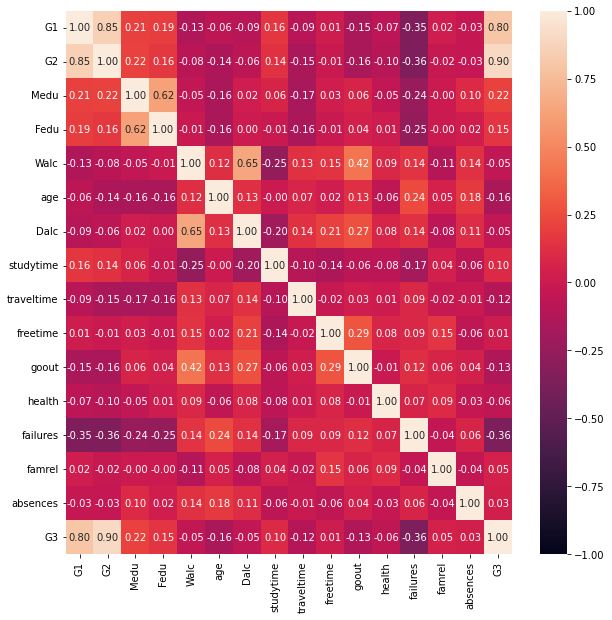

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data[numeric].corr(), annot=True, annot_kws={"fontsize":10}, fmt=".2f", vmin=-1)
plt.show()

Let us do some Exploratory data Analysis and find how dependent and independent features are related to each other.

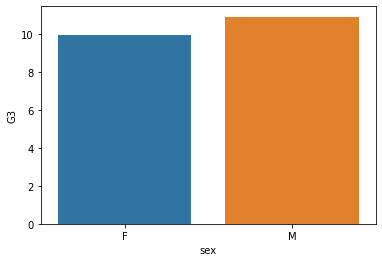

In [ ]:
sns.barplot(data['sex'],data['G3'],ci = 0)

We could see that male has performed well than female.

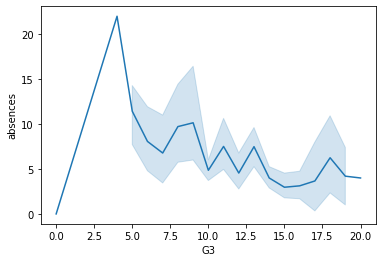

In [ ]:
sns.lineplot(data['G3'],data['absences'])

We could observe that as absences decreases, the Grade mark increases.So the students who are absent for most of the classes will get their grade low.

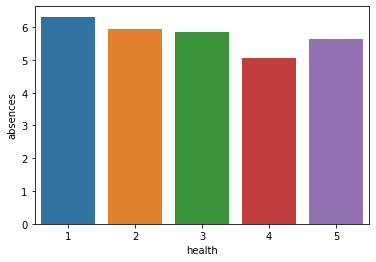

In [ ]:
sns.barplot(data['health'],data['absences'],ci = 0)

From this we could see that the students who are absent for most of the classes is not for bad health.Because even the students with good health(5) also has more absences.

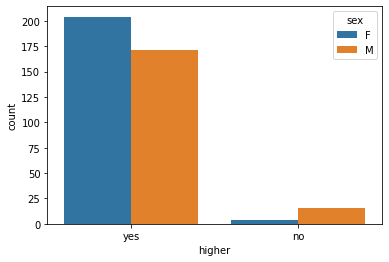

In [ ]:
sns.countplot(data['higher'],hue=data['sex'])

From this we could see that most of the students prefer to pursue Higher education.And even females preference was higher than male in pursuing higher education.

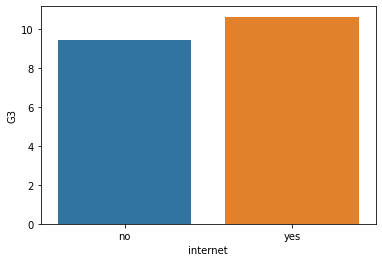

In [ ]:
sns.barplot(data['internet'],data['G3'],ci=0)

We could see that the students who got internet connection has scored better than the students who does'nt have internet connection.

Text(0.5, 0, 'Mother education')

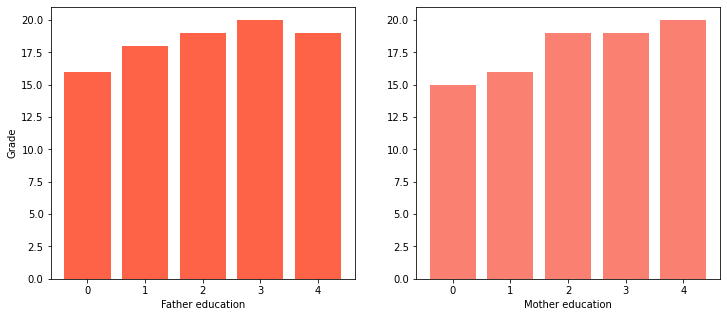

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data['Fedu'],data['G3'],color='tomato')
ax1.set_xlabel('Father education')
ax1.set_ylabel('Grade')
ax2.bar(data['Medu'],data['G3'],color='salmon')
ax2.set_xlabel('Mother education')
#(0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

From this we could see that Father's education does not affects student's grade but for the mothers who are educated their student's grade level got increased.It is because mothers teach their children.May be...

Text(0.5, 0, ' number of past class failures')

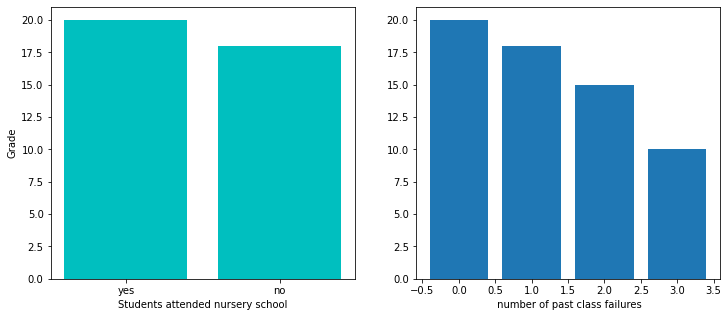

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data['nursery'],data['G3'],color='c')
ax1.set_xlabel('Students attended nursery school')
ax1.set_ylabel('Grade')
ax2.bar(data['failures'],data['G3'])
ax2.set_xlabel(' number of past class failures')


We could see that the students who attended nursery schools have performed well because of their primary Knowledge.

And also as no.of past class failures increases the grade decreases.

Text(0.5, 0, ' weekend alcohol consumption')

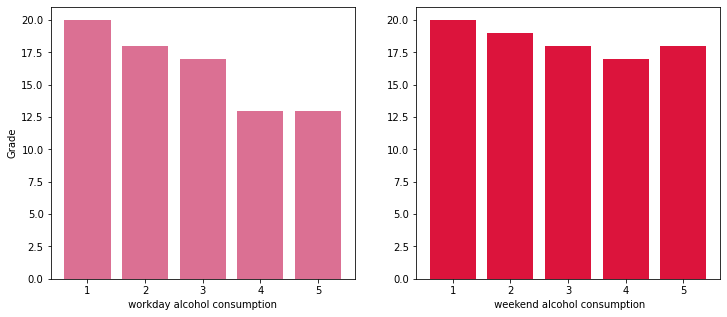

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data['Dalc'],data['G3'],color='palevioletred')
ax1.set_xlabel(' workday alcohol consumption ') #(numeric: from 1 - very low to 5 - very high)
ax1.set_ylabel('Grade')
ax2.bar(data['Walc'],data['G3'],color='crimson')
ax2.set_xlabel(' weekend alcohol consumption') #(numeric: from 1 - very low to 5 - very high)

From this graph we could see that how alcohol consumption has affected the students grade.

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Split the data into dependent and independent features.

In [ ]:
X=data[['G1','G2','Medu','Fedu','Walc','age','Dalc','studytime','traveltime','freetime','goout','health','failures','famrel','absences']]
y=data['G3']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Linear Regression

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
   
    print('R-squared value: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
from sklearn.linear_model import ElasticNet,Ridge,Lasso,LinearRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
linear=LinearRegression()
model_1=linear.fit(X_train,y_train)
pred_1=model_1.predict(X_test)
linear_result = regression_results(y_test, pred_1)

R-squared value:  0.7804
MAE:  1.3482
MSE:  4.5038
RMSE:  2.1222


In [ ]:
#putting together the coefficient and their corresponding variable names
linear_coef = pd.DataFrame()
linear_coef['Columns']= X_train.columns
linear_coef['Coefficient Estimate']= pd.Series(linear.coef_)
print(linear_coef)

       Columns  Coefficient Estimate
0           G1              0.160748
1           G2              0.977534
2         Medu              0.094194
3         Fedu             -0.188338
4         Walc              0.061756
5          age             -0.198011
6         Dalc             -0.105011
7    studytime             -0.066050
8   traveltime              0.131009
9     freetime              0.010623
10       goout              0.137633
11      health              0.059078
12    failures             -0.416258
13      famrel              0.334612
14    absences              0.044864


##### Elastic Net Without Library

In [ ]:
class ElasticRegression():
  def __init__(self, learning_rate, iterations, l1_penality, l2_penality):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.l1_penality = l1_penality
    self.l2_penality = l2_penality

  def fit(self, X, Y):  
    self.m, self.n = X.shape  
    self.W = np.zeros( self.n )
    self.b = 0
    self.X = X
    self.Y = Y
    # gradient descent learning
    for i in range( self.iterations):
        self.update_weights()
    return self
  def update_weights(self): 
      Y_pred = self.predict(self.X)
      # calculate gradients  
      dW = np.zeros(self.n)
      for j in range(self.n):
          if self.W[j] > 0 :
              dW[j] = (-( 2 * (self.X[:,j] ).dot( self.Y - Y_pred ) ) + 
                        self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m
          else :
              dW[j] = (-( 2 * ( self.X[:,j] ).dot(self.Y - Y_pred ))-self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m
      db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
      # update weights
      self.W = self.W - self.learning_rate * dW
      self.b = self.b - self.learning_rate * db
      return self
  def predict( self, X ):
    return X.dot( self.W ) + self.b 

In [ ]:
model = ElasticRegression(iterations = 1000,learning_rate = 0.01, l1_penality = .01, l2_penality = .01) 
model.fit(X_train.values,y_train.values)
Y_pred = model.predict(X_test.values)
Y_pred

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

##### Lasso

In [ ]:
lasso = Lasso(alpha=0.1)
model_2 = lasso.fit(X_train,y_train)
pred_2 = model_2.predict(X_test)
lasso_result = regression_results(y_test, pred_2)

R-squared value:  0.7902
MAE:  1.3066
MSE:  4.303
RMSE:  2.0744


In [ ]:
#putting together the coefficient and their corresponding variable names
lasso_coef = pd.DataFrame()
lasso_coef['Columns']= X_train.columns
lasso_coef['Coefficient Estimate']= pd.Series(lasso.coef_)
print(lasso_coef)

       Columns  Coefficient Estimate
0           G1              0.152208
1           G2              0.979473
2         Medu              0.000000
3         Fedu             -0.000000
4         Walc              0.000000
5          age             -0.143789
6         Dalc             -0.000000
7    studytime             -0.000000
8   traveltime              0.000000
9     freetime              0.000000
10       goout              0.059229
11      health              0.011988
12    failures             -0.192074
13      famrel              0.231458
14    absences              0.041863


In [ ]:
#sns.regplot(y_test,pred_2,scatter_kws={"color": "black"}, line_kws={"color": "green"})

##### Ridge

In [ ]:
ridge = Ridge(alpha=.1)
model_3 = ridge.fit(X_train,y_train)
pred_3 = model_3.predict(X_test)
ridge_result = regression_results(y_test, pred_3)

R-squared value:  0.7804
MAE:  1.3481
MSE:  4.5035
RMSE:  2.1221


In [ ]:
#putting together the coefficient and their corresponding variable names
ridge_coef = pd.DataFrame()
ridge_coef['Columns']= X_train.columns
ridge_coef['Coefficient Estimate']= pd.Series(ridge.coef_)
print(ridge_coef)

       Columns  Coefficient Estimate
0           G1              0.160813
1           G2              0.977475
2         Medu              0.094123
3         Fedu             -0.188209
4         Walc              0.061731
5          age             -0.198012
6         Dalc             -0.104938
7    studytime             -0.065992
8   traveltime              0.130902
9     freetime              0.010631
10       goout              0.137581
11      health              0.059060
12    failures             -0.415977
13      famrel              0.334491
14    absences              0.044863


##### Elastic Net

In [ ]:
elastic_net=ElasticNet(alpha=0.1, l1_ratio=.5)
model_4=elastic_net.fit(X_train,y_train)
pred_4=model_4.predict(X_test)
elastic_result = regression_results(y_test, pred_4)

R-squared value:  0.7855
MAE:  1.3194
MSE:  4.3992
RMSE:  2.0974


In [ ]:
#putting together the coefficient and their corresponding variable names
elastic_net_coef = pd.DataFrame()
elastic_net_coef['Columns']= X_train.columns
elastic_net_coef['Coefficient Estimate']= pd.Series(elastic_net.coef_)
print(elastic_net_coef)

       Columns  Coefficient Estimate
0           G1              0.166665
1           G2              0.968668
2         Medu              0.000000
3         Fedu             -0.063771
4         Walc              0.008679
5          age             -0.175624
6         Dalc             -0.000000
7    studytime             -0.000000
8   traveltime              0.026763
9     freetime              0.000000
10       goout              0.100335
11      health              0.032596
12    failures             -0.279774
13      famrel              0.266747
14    absences              0.043670


In [ ]:
accuracy_test = elastic_net.score(X_test, y_test)
accuracy_train = elastic_net.score(X_train, y_train)
print('Accuracy: ',accuracy_train)
print('Accuracy: ',accuracy_test)

Accuracy:  0.8466357794832635
Accuracy:  0.7854590664700447


### Using Gread Search CV

##### Lasso CV

In [ ]:
lasso = Lasso()
parameter = {"alpha":[1e-10,1e-5,1e-2,.1,1, 10,20,30,40,50,70,100,110,120,130,140,150]}
lasso_reg = GridSearchCV(lasso,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
lasso_reg.fit(X_train,y_train)
pred_5 = lasso_reg.predict(X_test)

In [ ]:
lasso_CV_result = regression_results(y_test, pred_5)

R-squared value:  0.7902
MAE:  1.3066
MSE:  4.303
RMSE:  2.0744


##### Ridge CV

In [ ]:
ridge = Ridge()
parameter = {"alpha":[1e-15,1e-10,1e-8,1e-5,1e-2,.01,.5,.1,10,20,30,40,50,70,100]}
ridge_reg = GridSearchCV(ridge,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
ridge_reg.fit(X_train,y_train)
pred_6=ridge_reg.predict(X_test)

In [ ]:
Ridge_CV_result = regression_results(y_test, pred_5)

R-squared value:  0.7902
MAE:  1.3066
MSE:  4.303
RMSE:  2.0744


##### Elastic NetCV

In [ ]:
elastic = ElasticNet()
parameter = {"l1_ratio":[0.4,0.5,0.6,.1,.001,.01],
             "alpha":[1e-10,1e-5,.01,.1,.001,5,10,20,30,40,50,70,100,110,120,130,140,150]}
elastic_reg = GridSearchCV(elastic,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
elastic_reg.fit(X_train,y_train)
pred_8 = elastic_reg.predict(X_test)

In [ ]:
elastic_net_CV_result = regression_results(y_test, pred_8)

R-squared value:  0.7855
MAE:  1.3194
MSE:  4.3992
RMSE:  2.0974


In [ ]:
print("Best Parameter ", elastic_reg.best_estimator_)

Best Parameter  ElasticNet(alpha=0.1)


### Proposed Model 

In [ ]:
elastic_net=ElasticNet(alpha=0.1, l1_ratio=.6)
model_elastic=elastic_net.fit(X_train,y_train)
pred_model=model_elastic.predict(X_test)
elastic_net_CV_result = regression_results(y_test, pred_model)

R-squared value:  0.7862
MAE:  1.3181
MSE:  4.3839
RMSE:  2.0938


In [ ]:
accuracy_train = elastic_net.score(X_train,y_train)
accuracy_test = elastic_net.score(X_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)


Accuracy train:  0.8462298154565823
Accuracy test:  0.7862019296596143


In [ ]:
Y_pred_ridge = ridge_reg.predict(X_test)
Y_pred_lasso = lasso_reg.predict(X_test)
Y_pred_elastic_net = elastic_reg.predict(X_test)

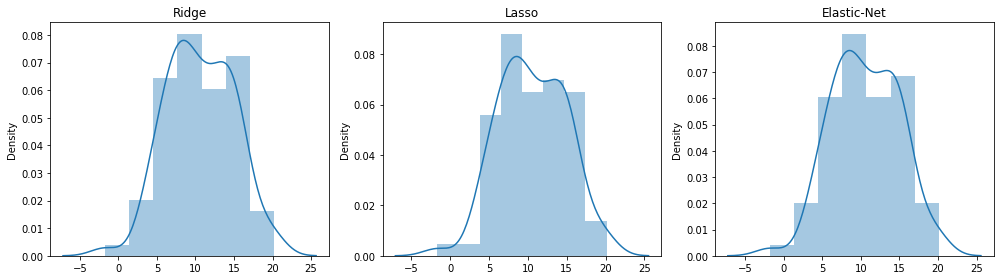

In [ ]:
plt.figure(figsize= (14,4))
plt.subplot(1, 3, 1)
sns.distplot(Y_pred_ridge)
plt.title("Ridge")

plt.subplot(1, 3, 2)
plt.title("Lasso")
sns.distplot(Y_pred_lasso)

plt.subplot(1, 3, 3)
plt.title("Elastic-Net")
sns.distplot(Y_pred_elastic_net)
plt.tight_layout()
plt.show()


We can observer that Predicted output value is better spread using Elastic-Net Model